# $$\color{red}{\text{Machine Learning}}$$

$$\color{orange}{\text{Support Vector Regression}}$$

$$\color{lime}{\text{Alireza Javid - 810198375}}$$

## $\color{deepskyblue}{\text{Import Libraries}}$

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# $\color{violet}{\text{Part 1:}}$

## $\color{deepskyblue}{\text{Preprocessing}}$

In [ ]:
data = pd.read_csv('Q7-Part1.csv')
y = data['Salary'].values
X = data['Level'].values

## $\color{deepskyblue}{\text{Model Training}}$
We use GridSearchCV to find the best hyperparameters for different kernels. As we see the polynomial kernel has the best results.

### $\color{lightgreen}{\text{RBF Kernel}}$

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100,10000], 'gamma':[1,0.1,0.01,0.001]}
grid = GridSearchCV(SVR(kernel='rbf'), param_grid, refit = True, verbose=3)
grid.fit(X.reshape(-1, 1), y)
y_pred_rbf = grid.predict(X.reshape(-1, 1))
mse_rbf = mean_squared_error(y, y_pred_rbf)
r2_rbf = r2_score(y, y_pred_rbf)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ................C=0.1, gamma=1;, score=-2600.999 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=1;, score=-110.250 total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=1;, score=-0.250 total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=1;, score=-9.610 total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=1;, score=-6.864 total time=   0.0s
[CV 1/5] END ..............C=0.1, gamma=0.1;, score=-2600.993 total time=   0.0s
[CV 2/5] END ...............C=0.1, gamma=0.1;, score=-110.249 total time=   0.0s
[CV 3/5] END .................C=0.1, gamma=0.1;, score=-0.250 total time=   0.0s
[CV 4/5] END .................C=0.1, gamma=0.1;, score=-9.610 total time=   0.0s
[CV 5/5] END .................C=0.1, gamma=0.1;, score=-6.864 total time=   0.0s
[CV 1/5] END .............C=0.1, gamma=0.01;, score=-2600.995 total time=   0.0s
[CV 2/5] END ..............C=0.1, gamma=0.01;, 

SVR(C=10000, gamma=0.1)
Mean Squared Error (MSE):
RBF Kernel: 84380660039.83066

R-squared Score:
RBF Kernel: -0.0460985162183134


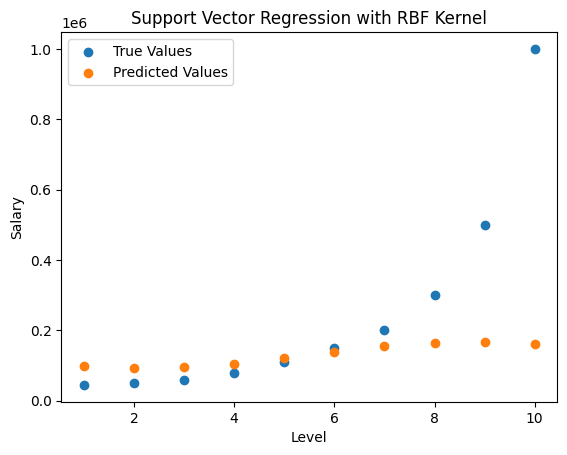

In [ ]:
print(grid.best_estimator_)
print("Mean Squared Error (MSE):")
print("RBF Kernel:", mse_rbf)
print("\nR-squared Score:")
print("RBF Kernel:", r2_rbf)
plt.scatter(x = X, y= y, label="True Values")
plt.scatter(x = X, y= y_pred_rbf, label="Predicted Values")
plt.title("Support Vector Regression with RBF Kernel")
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

### $\color{lightgreen}{\text{Linear Kernel}}$

In [ ]:
param_grid = {'C':[0.1,1,10,100,10000], 'gamma':[1,0.1,0.01,0.001]}
grid = GridSearchCV(SVR(kernel='linear'), param_grid, refit = True, verbose=3)
grid.fit(X.reshape(-1, 1), y)
y_pred_linear = grid.predict(X.reshape(-1, 1))
mse_linear = mean_squared_error(y, y_pred_linear)
r2_linear = r2_score(y, y_pred_linear)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ................C=0.1, gamma=1;, score=-2600.673 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=1;, score=-110.237 total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=1;, score=-0.250 total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=1;, score=-9.609 total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=1;, score=-6.864 total time=   0.0s
[CV 1/5] END ..............C=0.1, gamma=0.1;, score=-2600.673 total time=   0.0s
[CV 2/5] END ...............C=0.1, gamma=0.1;, score=-110.237 total time=   0.0s
[CV 3/5] END .................C=0.1, gamma=0.1;, score=-0.250 total time=   0.0s
[CV 4/5] END .................C=0.1, gamma=0.1;, score=-9.609 total time=   0.0s
[CV 5/5] END .................C=0.1, gamma=0.1;, score=-6.864 total time=   0.0s
[CV 1/5] END .............C=0.1, gamma=0.01;, score=-2600.673 total time=   0.0s
[CV 2/5] END ..............C=0.1, gamma=0.01;, 

SVR(C=10000, gamma=1, kernel='linear')
Mean Squared Error (MSE):
Linear Kernel: 40444521700.01319

R-squared Score:
Linear Kernel: 0.4985941788133459


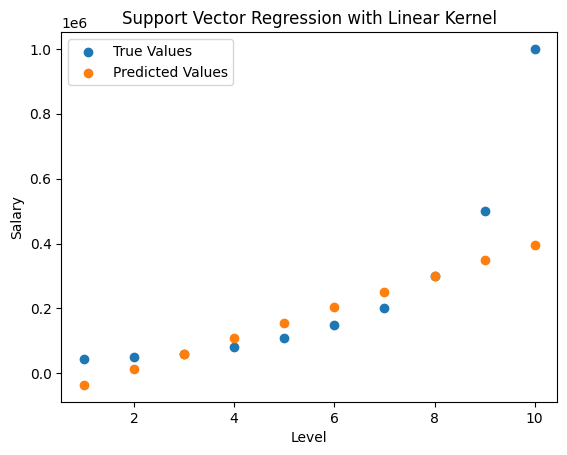

In [ ]:
print(grid.best_estimator_)
print("Mean Squared Error (MSE):")
print("Linear Kernel:", mse_linear)
print("\nR-squared Score:")
print("Linear Kernel:", r2_linear)
plt.scatter(x = X, y= y, label="True Values")
plt.scatter(x = X, y= y_pred_linear, label="Predicted Values")
plt.title("Support Vector Regression with Linear Kernel")
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

### $\color{lightgreen}{\text{Polynomial Kernel}}$

In [ ]:
param_grid = {'C':[0.1,1,10,100,10000], 'gamma':[1,0.1,0.01,0.001], 'degree':[1,2,3,4]}
grid = GridSearchCV(SVR(kernel='poly'), param_grid, refit = True, verbose=3)
grid.fit(X.reshape(-1, 1), y)
y_pred_polynomial = grid.predict(X.reshape(-1, 1))
mse_polynomial = mean_squared_error(y, y_pred_polynomial)
r2_polynomial = r2_score(y, y_pred_polynomial)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END ......C=0.1, degree=1, gamma=1;, score=-2600.673 total time=   0.0s
[CV 2/5] END .......C=0.1, degree=1, gamma=1;, score=-110.237 total time=   0.0s
[CV 3/5] END .........C=0.1, degree=1, gamma=1;, score=-0.250 total time=   0.0s
[CV 4/5] END .........C=0.1, degree=1, gamma=1;, score=-9.609 total time=   0.0s
[CV 5/5] END .........C=0.1, degree=1, gamma=1;, score=-6.864 total time=   0.0s
[CV 1/5] END ....C=0.1, degree=1, gamma=0.1;, score=-2600.967 total time=   0.0s
[CV 2/5] END .....C=0.1, degree=1, gamma=0.1;, score=-110.249 total time=   0.0s
[CV 3/5] END .......C=0.1, degree=1, gamma=0.1;, score=-0.250 total time=   0.0s
[CV 4/5] END .......C=0.1, degree=1, gamma=0.1;, score=-9.610 total time=   0.0s
[CV 5/5] END .......C=0.1, degree=1, gamma=0.1;, score=-6.864 total time=   0.0s
[CV 1/5] END ...C=0.1, degree=1, gamma=0.01;, score=-2600.997 total time=   0.0s
[CV 2/5] END ....C=0.1, degree=1, gamma=0.01;, 

SVR(C=1, gamma=1, kernel='poly')
Mean Squared Error (MSE):
Polynomial Kernel: 16483823630.377766

R-squared Score:
Polynomial Kernel: 0.7956438900430156


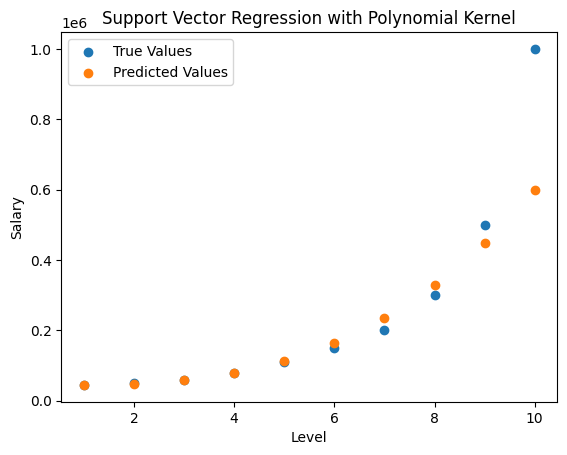

In [ ]:
print(grid.best_estimator_)
print("Mean Squared Error (MSE):")
print("Polynomial Kernel:", mse_polynomial)
print("\nR-squared Score:")
print("Polynomial Kernel:", r2_polynomial)
plt.scatter(x = X, y= y, label="True Values")
plt.scatter(x = X, y= y_pred_polynomial, label="Predicted Values")
plt.title("Support Vector Regression with Polynomial Kernel")
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

# $\color{violet}{\text{Part 2:}}$

## $\color{deepskyblue}{\text{Preprocessing}}$
We try to find the best features to find the best model and reduce the computation rate. After that, we begin to deal with categorical data with LabelEncoder and use StandardScaler to normalize the numerical values. We don't use the "Country" column because it has lots of Nan values and in H2.csv it contains many countries which is not found in the training dataset. 

In [3]:
train_df = pd.read_csv('H1.csv')
train_df.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus
0,0,342,2015,July,27,1,0,0,2,0,...,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out
1,0,737,2015,July,27,1,0,0,2,0,...,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out
2,0,7,2015,July,27,1,0,1,1,0,...,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out
3,0,13,2015,July,27,1,0,1,1,0,...,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out
4,0,14,2015,July,27,1,0,2,2,0,...,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out


<ipython-input-4-7c80c01cec20>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train_df.corr()


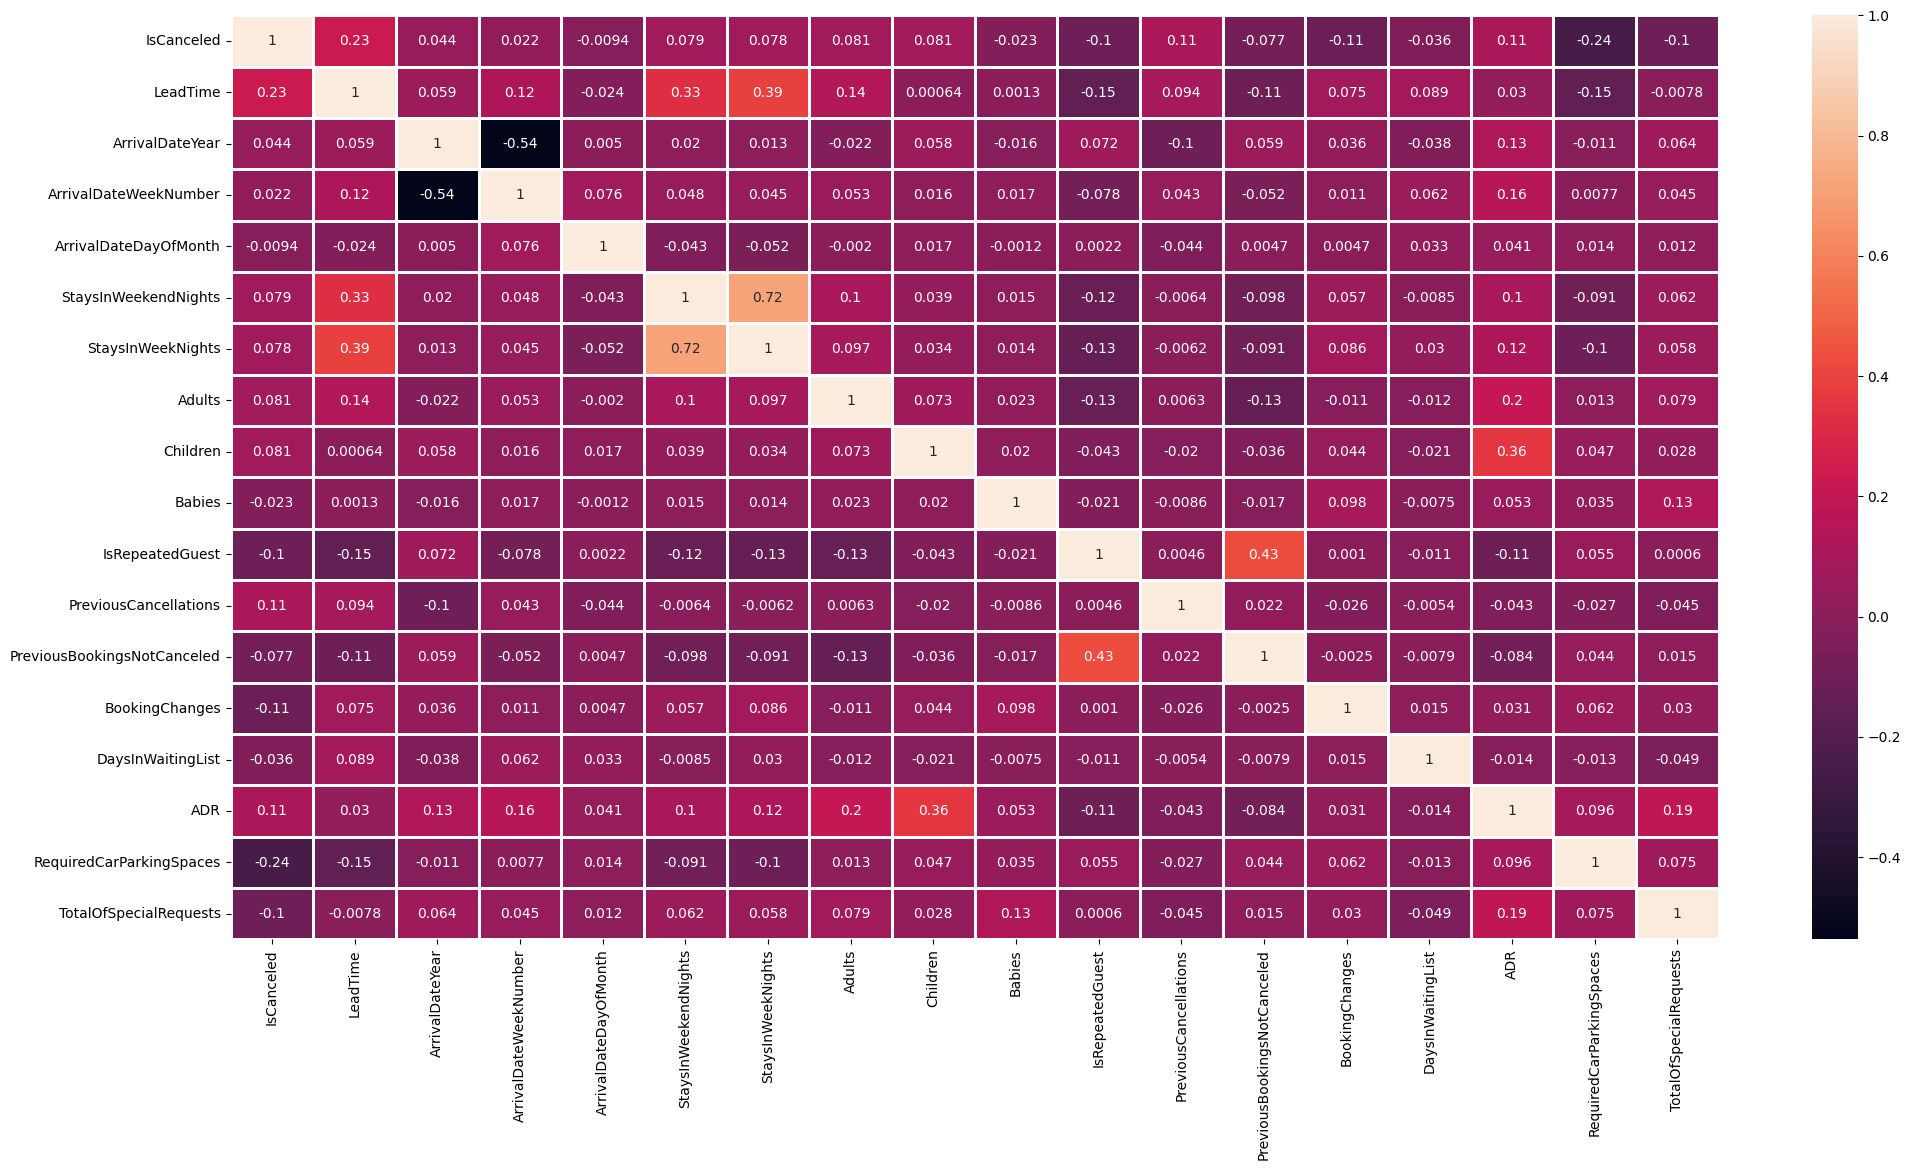

In [4]:
plt.figure(figsize = (24, 12))

corr = train_df.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [5]:
correlation = train_df.corr()['ADR'].abs().sort_values(ascending = False)
correlation

<ipython-input-5-9eb8d76ae66e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = train_df.corr()['ADR'].abs().sort_values(ascending = False)


ADR                            1.000000
Children                       0.355781
Adults                         0.202422
TotalOfSpecialRequests         0.185266
ArrivalDateWeekNumber          0.157066
ArrivalDateYear                0.127791
StaysInWeekNights              0.119572
IsCanceled                     0.109317
IsRepeatedGuest                0.106158
StaysInWeekendNights           0.103604
RequiredCarParkingSpaces       0.096120
PreviousBookingsNotCanceled    0.083925
Babies                         0.053371
PreviousCancellations          0.043399
ArrivalDateDayOfMonth          0.040700
BookingChanges                 0.030811
LeadTime                       0.030482
DaysInWaitingList              0.014189
Name: ADR, dtype: float64

In [52]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
x_train = np.column_stack((train_df['IsCanceled'],train_df.Country.astype("category").cat.codes
                      ,pd.Series(train_df.MarketSegment.astype("category").cat.codes),pd.Series(train_df.DepositType.astype("category").cat.codes)
                      ,pd.Series(train_df.CustomerType.astype("category").cat.codes),train_df['RequiredCarParkingSpaces'],train_df['ArrivalDateWeekNumber'],
                      train_df['Children'], train_df['Adults'], train_df['TotalOfSpecialRequests'], train_df['ArrivalDateYear'], train_df['StaysInWeekNights']
                      , train_df['IsRepeatedGuest'], train_df['StaysInWeekendNights'], train_df['RequiredCarParkingSpaces']))
x_train = sm.add_constant(x_train, prepend=True)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
y_train = np.array(train_df['ADR'])

## $\color{deepskyblue}{\text{Model Training}}$
We train our model with the H1.csv dataset. We can see the model performance in train data is relatively good. We use linear kernel for this part due to the computation effeciency and good discrimination.

In [53]:
from sklearn.svm import LinearSVR
svm_reg_05 = LinearSVR(epsilon=0.5)
svm_reg_05.fit(x_train, y_train)

LinearSVR(epsilon=0.5)

In [54]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

predictions05 = svm_reg_05.predict(x_train)
print('The Mean Absolute Error on train data is ' + str(mean_absolute_error(y_train, predictions05)))
print('The Mean Squared Error on train data is ' + str(mean_squared_error(y_train, predictions05)))

The Mean Absolute Error on train data is 38.126090635378034
The Mean Squared Error on train data is 3025.8811424554247


## $\color{deepskyblue}{\text{Model Evaluation}}$
Now we test our model with the H2.csv dataset. The exciting thing about this dataset is that it is greater than train data.

In [55]:
test_df = pd.read_csv('H2.csv')
test_df.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus
0,0,6,2015,July,27,1,0,2,1,0.0,...,A,A,0,No Deposit,0,Transient,0.0,0,0,Check-Out
1,1,88,2015,July,27,1,0,4,2,0.0,...,A,A,0,No Deposit,0,Transient,76.5,0,1,Canceled
2,1,65,2015,July,27,1,0,4,1,0.0,...,A,A,0,No Deposit,0,Transient,68.0,0,1,Canceled
3,1,92,2015,July,27,1,2,4,2,0.0,...,A,A,0,No Deposit,0,Transient,76.5,0,2,Canceled
4,1,100,2015,July,27,2,0,2,2,0.0,...,A,A,0,No Deposit,0,Transient,76.5,0,1,Canceled


In [56]:
test_df.dropna(inplace=True)
x_test = np.column_stack((test_df['IsCanceled'],test_df.Country.astype("category").cat.codes
                      ,pd.Series(test_df.MarketSegment.astype("category").cat.codes),pd.Series(test_df.DepositType.astype("category").cat.codes)
                      ,pd.Series(test_df.CustomerType.astype("category").cat.codes),test_df['RequiredCarParkingSpaces'],test_df['ArrivalDateWeekNumber'],
                      test_df['Children'], test_df['Adults'], test_df['TotalOfSpecialRequests'], test_df['ArrivalDateYear'], test_df['StaysInWeekNights']
                      , test_df['IsRepeatedGuest'], test_df['StaysInWeekendNights'], test_df['RequiredCarParkingSpaces']))
x_test = sm.add_constant(x_test, prepend=True)
x_test = scaler.fit_transform(x_test)
y_test = np.array(test_df['ADR'])

In [57]:
test_pred = svm_reg_05.predict(x_test)


print('The Mean Absolute Error on test data is ' + str(mean_absolute_error(y_test, test_pred)))
print('The Mean Squared Error on test data is ' + str(mean_squared_error(y_test, test_pred)))

The Mean Absolute Error on test data is 31.825632501579868
The Mean Squared Error on test data is 2109.006771577459


## $\color{deepskyblue}{\text{Model Predictation}}$

In [58]:
linear_df = pd.DataFrame()
linear_df['Real_ADR'] = y_test
linear_df['Predicted_ADR'] = test_pred
linear_df['Difference_ADR'] = y_test - linear_df['Predicted_ADR']
linear_df.to_csv("linear_kernel_prediction.csv")
linear_df.head()

,Real_ADR,Predicted_ADR,Difference_ADR
0,0.0,25.462459,-25.462459
1,76.5,77.970183,-1.470183
2,68.0,41.805834,26.194166
3,76.5,85.235557,-8.735557
4,76.5,74.245113,2.254887
